In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from openpyxl import load_workbook
import requests


In [2]:
airnow = pd.read_csv("C:/Users/girib/Desktop/capstone/data/Air_data/FinalAirNowData.csv")


(57598, 15)

In [3]:
airnow.groupby('reporting_area')['AQI'].mean().sort_values(ascending = False)

reporting_area
Mexico City         124.361702
Imperial Valley     109.597222
Mexicali            106.347222
C San Bernardino    104.894737
Brawley             104.513889
                       ...    
Ocean View           16.250000
Waikoloa             14.942857
Nespelem             14.555556
Telluride             8.500000
Saratoga              4.000000
Name: AQI, Length: 1087, dtype: float64

In [4]:
selected_states = ['TN','GA','AL','MS','AR','NC','SC','VA','MO','KY']
filtered_states = airnow.loc[airnow.state_code.isin(selected_states)]
filtered_states.shape

(10630, 15)

filtered_states.shape
filtered_states.to_excel('filtered_states.xlsx', index=False)

In [5]:
filtered_states

,reporting_area,state_code,lat,lang,CO,NO2,OZONE,PM10,PM2.5,date,year,month,weekday,month_name,AQI
2,Aiken-Augusta - SC/GA,SC,33.3700,-81.9700,NaN,NaN,0.0,17.0,40.0,1/1/2019 0:00,2019,1,1,January,40
19,Atlanta,GA,33.6500,-84.4300,NaN,NaN,20.0,22.0,42.0,1/1/2019 0:00,2019,1,1,January,42
29,Baskett,KY,37.8700,-87.4600,NaN,NaN,NaN,NaN,72.0,1/1/2019 0:00,2019,1,1,January,72
43,Birmingham,AL,33.5600,-86.7500,NaN,NaN,24.0,14.0,41.0,1/1/2019 0:00,2019,1,1,January,41
51,Bowling Green,KY,36.9685,-86.4808,NaN,NaN,NaN,NaN,28.0,1/1/2019 0:00,2019,1,1,January,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57580,Winchester,VA,39.1500,-78.1500,NaN,NaN,27.0,12.0,53.0,12/1/2024 0:00,2024,12,6,December,53
57584,Wythe Co.,VA,36.9500,-81.0800,NaN,NaN,34.0,NaN,NaN,12/1/2024 0:00,2024,12,6,December,34
57586,Yadkin County,NC,36.1605,-80.6652,NaN,NaN,NaN,NaN,45.0,12/1/2024 0:00,2024,12,6,December,45
57588,Yancey County,NC,35.8985,-82.3081,NaN,NaN,NaN,NaN,43.0,12/1/2024 0:00,2024,12,6,December,43


In [6]:
filtered_states.state_code.value_counts()

state_code
NC    5825
KY     752
MO     663
TN     621
GA     602
VA     584
SC     533
MS     464
AL     385
AR     201
Name: count, dtype: int64

In [7]:
filtered_states.dtypes

reporting_area     object
state_code         object
lat               float64
lang              float64
CO                float64
NO2               float64
OZONE             float64
PM10              float64
PM2.5             float64
date               object
year                int64
month               int64
weekday             int64
month_name         object
AQI                 int64
dtype: object

In [8]:
filtered_air_counts = filtered_states['reporting_area'].value_counts().reset_index()
area_filter = filtered_air_counts.loc[filtered_air_counts['count']>35]
area_to_keep = area_filter['reporting_area'].unique()


In [9]:
airnow_df= filtered_states.loc[filtered_states['reporting_area'].isin(area_to_keep)]
airnow_df.shape

(9912, 15)

In [10]:
airnow_df.AQI.max()

168

In [11]:
airnow_df.dtypes

reporting_area     object
state_code         object
lat               float64
lang              float64
CO                float64
NO2               float64
OZONE             float64
PM10              float64
PM2.5             float64
date               object
year                int64
month               int64
weekday             int64
month_name         object
AQI                 int64
dtype: object

In [12]:
airnow_df.loc[:, 'CO'] = airnow_df['CO'].round().astype('Int64')
airnow_df.loc[:, 'NO2'] = airnow_df['NO2'].round().astype('Int64')
airnow_df.loc[:, 'OZONE'] = airnow_df['OZONE'].round().astype('Int64')
airnow_df.loc[:, 'PM10'] = airnow_df['PM10'].round().astype('Int64')
airnow_df.loc[:, 'PM2.5'] = airnow_df['PM2.5'].round().astype('Int64')

C:\Users\girib\AppData\Local\Temp\ipykernel_6380\1045728513.py:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,
 ...
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>]
Length: 9912, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  airnow_df.loc[:, 'CO'] = airnow_df['CO'].round().astype('Int64')
C:\Users\girib\AppData\Local\Temp\ipykernel_6380\1045728513.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[<NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>,
 ...
 <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>, <NA>]
Length: 9912, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  airnow_df.loc[:, 'NO2'] = airnow_df['NO2'].ro

In [13]:
airnow_df.dtypes

reporting_area     object
state_code         object
lat               float64
lang              float64
CO                  Int64
NO2                 Int64
OZONE               Int64
PM10                Int64
PM2.5               Int64
date               object
year                int64
month               int64
weekday             int64
month_name         object
AQI                 int64
dtype: object

In [14]:
airnow_df['date'] =pd.to_datetime(airnow_df['date'])

C:\Users\girib\AppData\Local\Temp\ipykernel_6380\3043725553.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  airnow_df['date'] =pd.to_datetime(airnow_df['date'])


In [15]:
airnow_df.dtypes

reporting_area            object
state_code                object
lat                      float64
lang                     float64
CO                         Int64
NO2                        Int64
OZONE                      Int64
PM10                       Int64
PM2.5                      Int64
date              datetime64[ns]
year                       int64
month                      int64
weekday                    int64
month_name                object
AQI                        int64
dtype: object

In [16]:
airnow_df.head(1)

,reporting_area,state_code,lat,lang,CO,NO2,OZONE,PM10,PM2.5,date,year,month,weekday,month_name,AQI
19,Atlanta,GA,33.65,-84.43,<NA>,<NA>,20,22,42,2019-01-01,2019,1,1,January,42


In [17]:
airnow_df = airnow_df.reset_index(drop =True)
airnow_df


,reporting_area,state_code,lat,lang,CO,NO2,OZONE,PM10,PM2.5,date,year,month,weekday,month_name,AQI
0,Atlanta,GA,33.6500,-84.4300,<NA>,<NA>,20,22,42,2019-01-01,2019,1,1,January,42
1,Birmingham,AL,33.5600,-86.7500,<NA>,<NA>,24,14,41,2019-01-01,2019,1,1,January,41
2,Bowling Green,KY,36.9685,-86.4808,<NA>,<NA>,<NA>,<NA>,28,2019-01-01,2019,1,1,January,28
3,Catawba Indian Nation,SC,34.9126,-80.8743,<NA>,<NA>,<NA>,<NA>,36,2019-01-01,2019,1,1,January,36
4,Charleston,SC,32.8000,-79.9500,<NA>,<NA>,<NA>,<NA>,51,2019-01-01,2019,1,1,January,51
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,Wilkes County,NC,36.2061,-81.1632,<NA>,<NA>,<NA>,<NA>,45,2024-12-01,2024,12,6,December,45
9908,Wilson County,NC,35.7055,-77.9181,<NA>,<NA>,<NA>,<NA>,45,2024-12-01,2024,12,6,December,45
9909,Winchester,VA,39.1500,-78.1500,<NA>,<NA>,27,12,53,2024-12-01,2024,12,6,December,53
9910,Yadkin County,NC,36.1605,-80.6652,<NA>,<NA>,<NA>,<NA>,45,2024-12-01,2024,12,6,December,45


In [18]:
airnow_df['city_state'] = airnow_df.reporting_area + ", " + airnow_df.state_code

In [19]:
airnow_df['city_state'].tolist()

['Atlanta, GA',
 'Birmingham, AL',
 'Bowling Green, KY',
 'Catawba Indian Nation, SC',
 'Charleston, SC',
 'Chattanooga, TN',
 'Clarksville-Montgomery County, TN',
 'Cleveland, MS',
 'Columbia, SC',
 'El Dorado Springs, MO',
 'Elizabethtown, KY',
 'Forsyth County-Winston-Salem-Greensboro-High Point, NC',
 'Great Smoky Mtns. Natl. Park - TN, TN',
 'Greenville-Spartanburg, SC',
 'Hampton Roads, VA',
 'Hattiesburg, MS',
 'Hazard, KY',
 'Hernando, MS',
 'Huntsville, AL',
 'Jackson, MS',
 'Kansas City, MO',
 'Knoxville, TN',
 'Little Rock, AR',
 'Louisville, KY',
 'Macon, GA',
 'Mammoth Cave National Park, KY',
 'Mark Twain State Park, MO',
 'Memphis, TN',
 'Mississippi Gulf Coast, MS',
 'Nashville, TN',
 'Northern Kentucky, KY',
 'Northern Virginia, VA',
 'Owensboro, KY',
 'Paducah, KY',
 'Pikeville, KY',
 'Richmond, VA',
 'Roanoke, VA',
 'Saint Louis, MO',
 'Shenandoah National Park, VA',
 'Springdale (Springdale-Fayetteville-Bentonville), AR',
 'Springfield, MO',
 'St. Joseph, MO',
 'Tri

In [20]:
airnow_df.lat.min()

30.37

In [21]:
airnow_df.lang.max()

-75.7824

In [22]:
airnow_df.AQI.max()

168

In [23]:
airnow_df.to_excel("airnow_final.xlsx", index=False)

<Axes: xlabel='year', ylabel='AQI'>

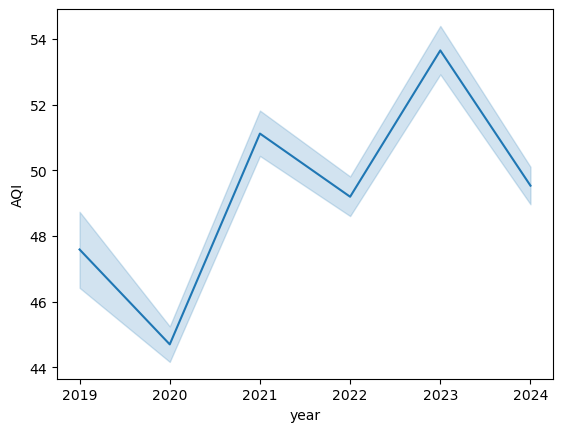

In [24]:
sns.lineplot(data = airnow_df,x= 'year',y = 'AQI')

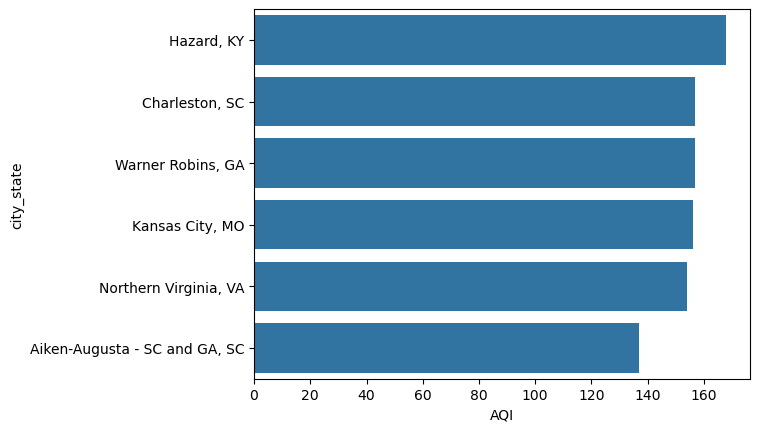

In [25]:
max_aqi_per_city = airnow_df.groupby('city_state')['AQI'].max().reset_index()
top_5_worst = max_aqi_per_city.sort_values('AQI',ascending = False).head(6)
sns.barplot(data = top_5_worst, x= 'AQI',y = 'city_state')
plt.show()

#### Top 5 in air quality(good places)

In [26]:
top_5_worst

,city_state,AQI
67,"Hazard, KY",168
27,"Charleston, SC",157
152,"Warner Robins, GA",157
81,"Kansas City, MO",156
112,"Northern Virginia, VA",154
0,"Aiken-Augusta - SC and GA, SC",137


In [27]:
min_aqi_per_city = airnow_df.groupby('city_state')['AQI'].min().reset_index().sort_values(by = 'AQI',ascending =False)
bottom_5_good  = min_aqi_per_city.head(6)

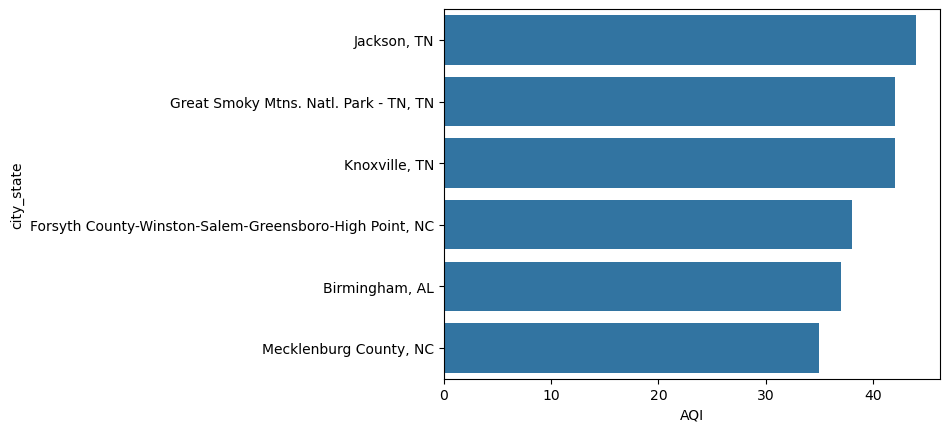

In [28]:
sns.barplot(data = bottom_5_good,x='AQI',y = 'city_state')
plt.show()

Finding avg aqi across all years.1.Highest AQI city (worst air over 4 years)-- memphis

2.Lowest AQI city (cleanest air over 4 years)-- springfield


In [29]:
avg_aqi = airnow_df.groupby('city_state')['AQI'].mean().reset_index()
avg_aqi_cities = avg_aqi.sort_values('AQI',ascending =False)

most_polluted =avg_aqi_cities.head(1)
most_polluted

,city_state,AQI
98,"Memphis, TN",63.416667


In [30]:
least_polluted = avg_aqi_cities.tail(1)
least_polluted

,city_state,AQI
139,"Springfield, MO",30.208333


In [31]:
airnow_df.dtypes

reporting_area            object
state_code                object
lat                      float64
lang                     float64
CO                         Int64
NO2                        Int64
OZONE                      Int64
PM10                       Int64
PM2.5                      Int64
date              datetime64[ns]
year                       int64
month                      int64
weekday                    int64
month_name                object
AQI                        int64
city_state                object
dtype: object

In [32]:
airnow_df
def get_season(month):
    if month in [12,1,2]:
         return 'Winter'
    elif month in[3,4,5]:
        return 'Spring'
    elif month in [6,7,8]:
        return 'Summer'
    elif month in [9,10,11]:
        return 'Fall'
    else:
        'unknown'

In [33]:
airnow_df['season'] = airnow_df['month'].map(get_season)

In [34]:
airnow_df.season.value_counts()

season
Fall      2517
Summer    2497
Spring    2482
Winter    2416
Name: count, dtype: int64

In [35]:
avg_aqi_cities

,city_state,AQI
98,"Memphis, TN",63.416667
97,"Mecklenburg County, NC",63.213115
52,Forsyth County-Winston-Salem-Greensboro-High P...,62.083333
13,"Birmingham, AL",61.791667
81,"Kansas City, MO",61.513889
...,...,...
94,"Mark Twain State Park, MO",33.458333
85,"Leslie, GA",33.189189
99,"Meridian, MS",31.888889
142,"Summerville, GA",31.054054


In [36]:
top5_cities = (
    airnow_df.groupby('city_state')['AQI']
    .mean()
    .nlargest(5)
    .index
)

df_top5 = airnow_df[airnow_df['city_state'].isin(top5_cities)]

In [37]:
airnow_df.dtypes

reporting_area            object
state_code                object
lat                      float64
lang                     float64
CO                         Int64
NO2                        Int64
OZONE                      Int64
PM10                       Int64
PM2.5                      Int64
date              datetime64[ns]
year                       int64
month                      int64
weekday                    int64
month_name                object
AQI                        int64
city_state                object
season                    object
dtype: object

In [38]:
df_top5.city_state.value_counts()

city_state
Birmingham, AL                                            72
Forsyth County-Winston-Salem-Greensboro-High Point, NC    72
Kansas City, MO                                           72
Memphis, TN                                               72
Mecklenburg County, NC                                    61
Name: count, dtype: int64

In [39]:
seasonal_aqi = df_top5 .groupby(['city_state','season']).agg({"AQI":"mean"})
seasonal_aqi

AQI
city_state                                         season           
Birmingham, AL                                     Fall    61.000000
                                                   Spring  61.166667
                                                   Summer  68.222222
                                                   Winter  56.777778
Forsyth County-Winston-Salem-Greensboro-High Po... Fall    57.944444
                                                   Spring  58.888889
                                                   Summer  67.888889
                                                   Winter  63.611111
Kansas City, MO                                    Fall    59.611111
                                                   Spring  61.888889
                                                   Summer  71.666667
                                                   Winter  52.888889
Mecklenburg County, NC                             Fall    63.466667
                                                   Spring  58.933333
                                                   Summer  75.266667
                                                   Winter  55.687500
Memphis, TN                                        Fall    64.055556
                                                   Spring  59.722222
                                                   Summer  73.111111
                                                   Winter  56.777778

In [56]:
airnow_df.shape

(9912, 17)

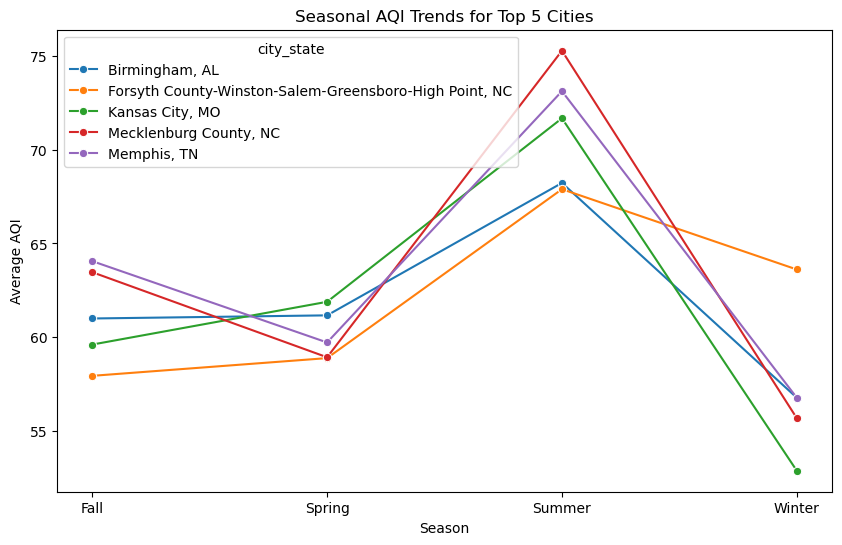

In [40]:
plt.figure(figsize=(10,6))
sns.lineplot(x='season', y='AQI', hue='city_state', data=seasonal_aqi, marker='o')
plt.title('Seasonal AQI Trends for Top 5 Cities')
plt.ylabel('Average AQI')
plt.xlabel('Season')
plt.show()

In [41]:
airnow_df.reporting_area.to_list()

['Atlanta',
 'Birmingham',
 'Bowling Green',
 'Catawba Indian Nation',
 'Charleston',
 'Chattanooga',
 'Clarksville-Montgomery County',
 'Cleveland',
 'Columbia',
 'El Dorado Springs',
 'Elizabethtown',
 'Forsyth County-Winston-Salem-Greensboro-High Point',
 'Great Smoky Mtns. Natl. Park - TN',
 'Greenville-Spartanburg',
 'Hampton Roads',
 'Hattiesburg',
 'Hazard',
 'Hernando',
 'Huntsville',
 'Jackson',
 'Kansas City',
 'Knoxville',
 'Little Rock',
 'Louisville',
 'Macon',
 'Mammoth Cave National Park',
 'Mark Twain State Park',
 'Memphis',
 'Mississippi Gulf Coast',
 'Nashville',
 'Northern Kentucky',
 'Northern Virginia',
 'Owensboro',
 'Paducah',
 'Pikeville',
 'Richmond',
 'Roanoke',
 'Saint Louis',
 'Shenandoah National Park',
 'Springdale (Springdale-Fayetteville-Bentonville)',
 'Springfield',
 'St. Joseph',
 'Tri-Cities',
 'Winchester',
 'Ashland',
 'Atlanta',
 'Birmingham',
 'Bowling Green',
 'Catawba Indian Nation',
 'Charleston',
 'Chattanooga',
 'Clarksville-Montgomery Coun

In [42]:
airnow_df.to_excel("airnow_finale.xlsx", index=False)


In [43]:
airnow_df

,reporting_area,state_code,lat,lang,CO,NO2,OZONE,PM10,PM2.5,date,year,month,weekday,month_name,AQI,city_state,season
0,Atlanta,GA,33.6500,-84.4300,<NA>,<NA>,20,22,42,2019-01-01,2019,1,1,January,42,"Atlanta, GA",Winter
1,Birmingham,AL,33.5600,-86.7500,<NA>,<NA>,24,14,41,2019-01-01,2019,1,1,January,41,"Birmingham, AL",Winter
2,Bowling Green,KY,36.9685,-86.4808,<NA>,<NA>,<NA>,<NA>,28,2019-01-01,2019,1,1,January,28,"Bowling Green, KY",Winter
3,Catawba Indian Nation,SC,34.9126,-80.8743,<NA>,<NA>,<NA>,<NA>,36,2019-01-01,2019,1,1,January,36,"Catawba Indian Nation, SC",Winter
4,Charleston,SC,32.8000,-79.9500,<NA>,<NA>,<NA>,<NA>,51,2019-01-01,2019,1,1,January,51,"Charleston, SC",Winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9907,Wilkes County,NC,36.2061,-81.1632,<NA>,<NA>,<NA>,<NA>,45,2024-12-01,2024,12,6,December,45,"Wilkes County, NC",Winter
9908,Wilson County,NC,35.7055,-77.9181,<NA>,<NA>,<NA>,<NA>,45,2024-12-01,2024,12,6,December,45,"Wilson County, NC",Winter
9909,Winchester,VA,39.1500,-78.1500,<NA>,<NA>,27,12,53,2024-12-01,2024,12,6,December,53,"Winchester, VA",Winter
9910,Yadkin County,NC,36.1605,-80.6652,<NA>,<NA>,<NA>,<NA>,45,2024-12-01,2024,12,6,December,45,"Yadkin County, NC",Winter


In [44]:
airnow_df.reporting_area.value_counts()

reporting_area
Columbia                         87
Jackson                          73
Birmingham                       72
Clarksville-Montgomery County    72
Chattanooga                      72
                                 ..
Albany                           44
Florence and Darlington          40
Aiken-Augusta - SC and GA        40
Leslie                           37
Summerville                      37
Name: count, Length: 159, dtype: int64

In [57]:
census = pd.read_csv('../data/Censusfinale.csv')
census.shape


(95, 6)

In [52]:
pd.set_option('display.max_columns',None)

In [64]:
merged = pd.merge(airnow_df,census,left_on = ('reporting_area','year'),right_on = ('city','year'),how = 'inner')
merged.head()


,reporting_area,state_code,lat,lang,CO,NO2,OZONE,PM10,PM2.5,date,year,month,weekday,month_name,AQI,city_state,season,city,state,area_miles,population,density
0,Atlanta,GA,33.6500,-84.4300,<NA>,<NA>,31,18,56,2020-01-01,2020,1,2,January,56,"Atlanta, GA",Winter,Atlanta,GA,3657.47,5803000,1586.62
1,Birmingham,AL,33.5600,-86.7500,<NA>,<NA>,36,9,46,2020-01-01,2020,1,2,January,46,"Birmingham, AL",Winter,Birmingham,AL,1488.16,842000,565.80
2,Charleston,SC,32.8000,-79.9500,<NA>,<NA>,36,<NA>,23,2020-01-01,2020,1,2,January,36,"Charleston, SC",Winter,Charleston,SC,1426.25,708000,496.41
3,Chattanooga,TN,35.0433,-85.3100,<NA>,<NA>,<NA>,<NA>,49,2020-01-01,2020,1,2,January,49,"Chattanooga, TN",Winter,Chattanooga,TN,828.38,421000,508.22
4,Cleveland,MS,33.7440,-90.7248,<NA>,<NA>,<NA>,<NA>,23,2020-01-01,2020,1,2,January,23,"Cleveland, MS",Winter,Cleveland,MS,19.63,1763000,89811.51


In [65]:
merged.tail()

,reporting_area,state_code,lat,lang,CO,NO2,OZONE,PM10,PM2.5,date,year,month,weekday,month_name,AQI,city_state,season,city,state,area_miles,population,density
1124,Myrtle Beach,SC,33.8005,-78.9941,<NA>,<NA>,<NA>,<NA>,38,2024-12-01,2024,12,6,December,38,"Myrtle Beach, SC",Winter,Myrtle Beach,SC,530.93,432000,813.67
1125,Nashville,TN,36.1710,-86.7850,<NA>,<NA>,<NA>,10,51,2024-12-01,2024,12,6,December,51,"Nashville, TN",Winter,Nashville,TN,2121.45,1333000,628.34
1126,Richmond,VA,37.5310,-77.4750,<NA>,<NA>,32,6,29,2024-12-01,2024,12,6,December,32,"Richmond, VA",Winter,Richmond,VA,737.35,1151000,1561.00
1127,Savannah,GA,32.0683,-81.0496,<NA>,<NA>,<NA>,24,58,2024-12-01,2024,12,6,December,58,"Savannah, GA",Winter,Savannah,GA,607.97,343000,564.17
1128,Springfield,MO,37.2619,-93.2981,<NA>,<NA>,<NA>,20,53,2024-12-01,2024,12,6,December,53,"Springfield, MO",Winter,Springfield,MO,368.02,685000,1861.31


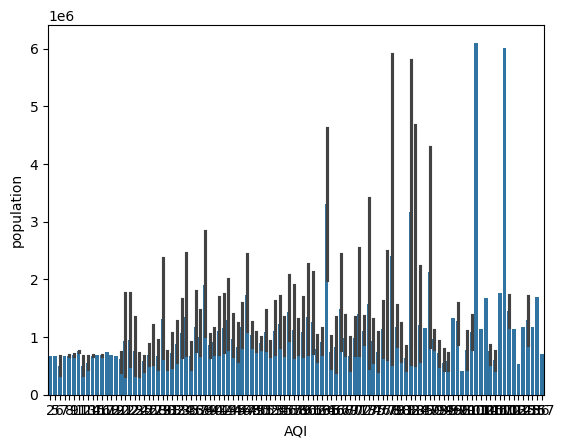

In [67]:
sns.barplot(data = merged,x='AQI',y = 'population')
plt.show()